
# Práctica 1: Robot móvil (Parte 3) — Modelo cinemático unicycle
## Jordi Blasco Lozano

**Enunciado general (caso: aspiradora autónoma doméstica).**  
En esta práctica modelaremos un **robot móvil** tipo *unicycle* (como una **aspiradora autónoma**) en el plano. El estado del robot es $(x, y, \theta)$, donde $(x,y)$ es su **posición** y $\theta$ su **orientación**. Las entradas de control son $u=(v,\omega)$, con $v$ la **velocidad lineal** y $\omega$ la **velocidad angular**. Trabajaremos con **soluciones numéricas** y, más adelante, añadiremos **incertidumbre** para representar efectos como **deslizamiento**, **ruido del actuador** o **errores de odometría**. En cada ejercicio encontrarás:
- Un **enunciado** con lo que se pide.
- Bloques de **preguntas y reflexión**.
- Debes generar un nuevo bloque con el código que se pide en cada ejercicio.

## Ejemplo de funciones para gráficas

A continuación se muestra código de ejemplo, organizado en funciones, para poder mostrar el estado del robot en cada iteración de la integración numérica:


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

try:
    import ipywidgets as widgets
    from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
except Exception as e:
    print("Si ipywidgets no está disponible, instala con: pip install ipywidgets y reinicia el entorno.")

plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["axes.grid"] = True

def unicycle_rhs(state, u):
    x, y, th = state
    v, om = u
    return np.array([v*np.cos(th), v*np.sin(th), om])

def plot_robot_state(path_xy, state, title="Robot móvil (unicycle)"):
    x, y, th = state
    xs = [p[0] for p in path_xy]
    ys = [p[1] for p in path_xy]

    plt.figure()
    plt.plot(xs, ys, lw=2, label="Trayectoria")
    plt.scatter([x], [y], s=60, label="Posición")
    L = 0.5
    dx = L*np.cos(th)
    dy = L*np.sin(th)
    plt.arrow(x, y, dx, dy, head_width=0.2, head_length=0.2, length_includes_head=True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.title(title)
    plt.legend()
    plt.show()

def simulate_and_plot_stepwise(state0, u, dt, steps, pause=0.01, title_prefix="", update_every=20):
    state = np.array(state0, dtype=float)
    path_xy = [state[:2].copy()]

    for k in range(steps):
        deriv = unicycle_rhs(state, u)
        state = state + dt*deriv
        path_xy.append(state[:2].copy())

        if (k+1) % update_every == 0 or (k+1) == steps:
            clear_output(wait=True)
            plot_robot_state(path_xy, state, title=f"{title_prefix} Paso {k+1}/{steps}  |  u=(v={u[0]:.2f}, ω={u[1]:.2f})")
            display(plt.gcf())
            time.sleep(pause)
    return np.array(path_xy), state



## Ejercicio 1. Modelo cinemático $(x,y,\theta)$ con solución numérica paso a paso

**Contexto (aspiradora autónoma).**  
Una aspiradora **autónoma** se desplaza en el suelo con cinemática tipo *unicycle*. Sus ecuaciones de movimiento (en un plano) son:
$$
\dot{x} = v\cos\theta,\qquad
\dot{y} = v\sin\theta,\qquad
\dot{\theta} = \omega,
$$
donde $v$ es la velocidad lineal y $\omega$ la velocidad angular.

**Tareas.**
1. Integra **numéricamente** el sistema y **muestra los resultados en cada 20 iteraciones** para $u=(v,\omega)$ constante.  
2. La figura debe mostrar:
   - Ejes **X–Y**.
   - La **trayectoria** (línea azul).
   - La **posición** actual del robot (punto **rojo**).
   - La **orientación** del robot (flecha **roja**).
3. **Inicializa** con condiciones para describir un **círculo** y **ejecuta dos vueltas completas**.

> *Pista:* para una trayectoria circular, si $u=(v,\omega)$ es constante y $\omega\neq 0$, el radio es $R=\frac{v}{\omega}$. Para dar dos vueltas, integra durante un tiempo $T=\frac{4\pi}{\omega}$.

**A continuación se proporciona la solución:**


<Figure size 600x600 with 0 Axes>

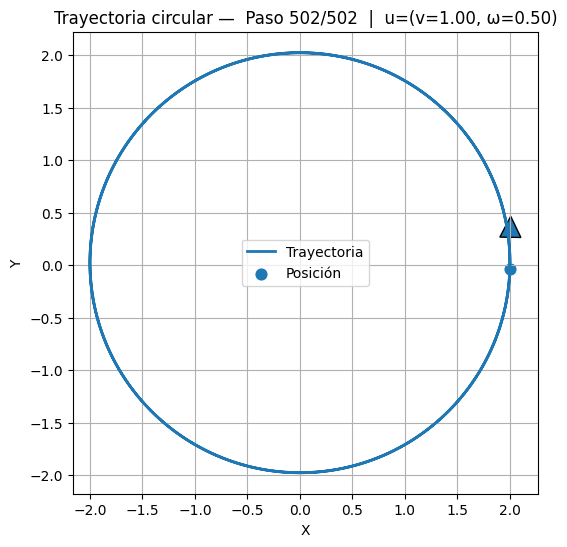

<Figure size 600x600 with 0 Axes>

Estado final: [ 1.99932278 -0.03273471 14.12079633]


<Figure size 600x600 with 0 Axes>

In [3]:

# Parámetros para dos vueltas en círculo
v = 1.0
omega = 0.5
T = 4*np.pi/omega
dt = 0.05
steps = int(T/dt)

x0, y0, th0 = 2.0, 0.0, np.pi/2

path, final_state = simulate_and_plot_stepwise(
    state0=(x0, y0, th0),
    u=(v, omega),
    dt=dt,
    steps=steps,
    pause=0.5,
    title_prefix="Trayectoria circular — ",
    update_every=20
)

print("Estado final:", final_state)



> **Preguntas (responder en texto):**
> 1. ¿Qué **representación matemática** se está utilizando (p.ej., espacio de estados, ecuaciones diferenciales, etc.)?
> 2. Clasifica el sistema según:
>    - Relación entrada–salida  
>    - Tipo de incertidumbre  
>    - Naturaleza de tiempo  
>    - Dependencia temporal
>
> 3. **Explica y razona** qué está ocurriendo en el movimiento. ¿Es repetitivo el proceso? ¿Qué pasaría si se dan más vueltas?


### Respuestas al Ejercicio 1 - Parte 3

1.  **Representación matemática:**
    Se está utilizando un modelo en espacio de estados con ecuaciones diferenciales. El estado es `(x, y, θ)` y las entradas son `(v, ω)`. Las ecuaciones diferenciales nos dicen cómo cambia el estado en función de las entradas.

2.  **Clasificación del sistema:**
    *   **Relación entrada–salida:** Es un sistema con entrada. Las entradas `u = (v, ω)` controlan cómo evoluciona el estado.
    *   **Tipo de incertidumbre:** Es determinista. Con las mismas entradas y condiciones iniciales, siempre obtenemos la misma trayectoria.
    *   **Naturaleza de tiempo:** Es de tiempo continuo. El robot se mueve de forma suave.
    *   **Dependencia temporal:** Es invariante en el tiempo. Las reglas de movimiento no cambian con el tiempo.

3.  **Explicación del movimiento:**
    El robot describe un círculo perfecto. Esto ocurre porque:
    *   La velocidad lineal `v` es constante → el robot avanza siempre a la misma velocidad.
    *   La velocidad angular `ω` es constante → el robot gira siempre a la misma velocidad.
    *   El radio del círculo es `R = v/ω`.
    
    **¿Es repetitivo?** Sí, Cada vuelta completa tarda `T = 2π/ω` segundos. Si das más vueltas, el robot seguirá el mismo círculo una y otra vez, pasando por los mismos puntos a los mismos intervalos de tiempo.


## Ejercicio 2. Incertidumbre aleatoria e interactividad

**Enunciado.**  
Una aspiradora real sufre **ruidos** y **deslizamientos**: la odometría y los actuadores no son perfectos. Añade una **variable aleatoria** como incertidumbre sobre cada variable de control $u=(v,\omega)$, y define la varianza de cada variable aleatoria como $\sigma = (\sigma_v,\sigma_\omega)$, no es necesario incluir interactividad. Observa cómo cambia la trayectoria para distintos valores de $σ$.

> **Preguntas (responder en texto):**
> 1. Clasifica el sistema según:
>    - Relación entrada–salida  
>    - Tipo de incertidumbre  
>    - Naturaleza de tiempo  
>    - Dependencia temporal
>
> 2. ¿Qué ocurre si ejecutas con **incertidumbre** $\sigma = (0, 0)$? ¿Y si ejecutas varias veces con distintas incertidumbres? Prueba también con incertidumbres altas.
>
> 3. ¿Por qué se comporta así el sistema con alta incertidumbre? ¿Es repetitivo el proceso? ¿Qué pasaría si se dan más vueltas?


### Respuestas al Ejercicio 2 - Parte 3

1.  **Clasificación del sistema (con incertidumbre):**
    *   **Relación entrada–salida:** Sigue siendo un sistema con entrada.
    *   **Tipo de incertidumbre:** Ahora es estocástico (aleatorio). Cada ejecución dará una trayectoria diferente debido al ruido.
    *   **Naturaleza de tiempo:** Sigue siendo de tiempo continuo.
    *   **Dependencia temporal:** Sigue siendo invariante en el tiempo.

2.  **Comportamiento con diferentes σ:**
    *   **σ = (0, 0):** Sin ruido. El robot se comporta igual que en el ejercicio 1 - círculo perfecto.
    *   **σ pequeño:** La trayectoria es casi un círculo, pero con pequeñas desviaciones.
    *   **σ grande:** La trayectoria se deforma mucho. Puede que el robot termine muy lejos de donde debería estar. Hace traytectorias con mucha incertidumbre.
    *   **Ejecutar varias veces:** Cada ejecución hace una trayectoria diferente, incluso con los mismos parámetros de ruido.

3.  **¿Por qué se comporta así con alta incertidumbre?**
    El ruido se acumula a lo largo del tiempo. Cada pequeño error en `v` y `ω` afecta no solo a la posición actual, sino que se propaga a todos los pasos siguientes. 
    
    **¿Es repetitivo?** No, con incertidumbre alta, cada ejecución es impredecible. Con más vueltas, los errores se acumulan más y la trayectoria final puede ser completamente diferente a la esperada.

<Figure size 600x600 with 0 Axes>

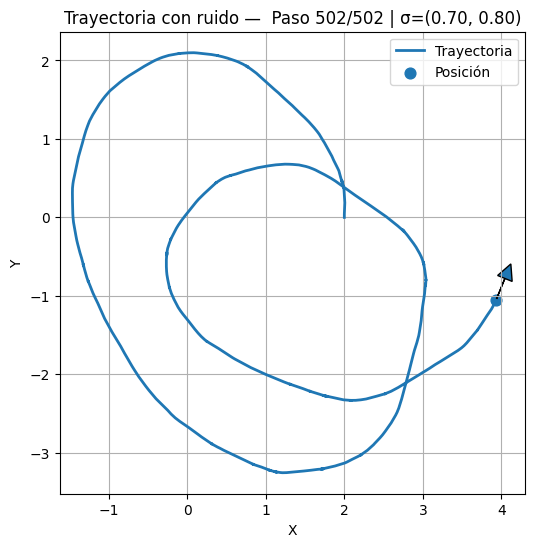

<Figure size 600x600 with 0 Axes>

Estado final con incertidumbre: [ 3.93192959 -1.05591425 13.7485774 ]


<Figure size 600x600 with 0 Axes>

In [4]:
# Función para simular con incertidumbre (ruido)
def simulate_and_plot_stochastic(state0, u, dt, steps, sigmas, pause=0.01, title_prefix="", update_every=20):


    state = np.array(state0, dtype=float)
    path_xy = [state[:2].copy()]
    v_base, omega_base = u
    sigma_v, sigma_omega = sigmas

    for k in range(steps):
        # Añadimos ruido gaussiano a los controles en cada paso
        v_noisy = v_base + np.random.normal(0, sigma_v)
        omega_noisy = omega_base + np.random.normal(0, sigma_omega)
        u_noisy = (v_noisy, omega_noisy)
        
        # Calculamos la derivada y actualizamos el estado
        deriv = unicycle_rhs(state, u_noisy)
        state = state + dt*deriv
        path_xy.append(state[:2].copy())

        # Actualizamos la gráfica cada cierto número de pasos
        if (k+1) % update_every == 0 or (k+1) == steps:
            clear_output(wait=True)
            plot_robot_state(path_xy, state, title=f"{title_prefix} Paso {k+1}/{steps} | σ=({sigma_v:.2f}, {sigma_omega:.2f})")
            display(plt.gcf())
            time.sleep(pause)
            
    return np.array(path_xy), state


# Parámetros base 
v = 1.0
omega = 0.5
T = 4*np.pi/omega
dt = 0.05
steps = int(T/dt)
x0, y0, th0 = 2.0, 0.0, np.pi/2

# Definimos la incertidumbre

sigma_v = 0.7  # Ruido en la velocidad lineal
sigma_omega = 0.8  # Ruido en la velocidad angular


path_stochastic, final_state_stochastic = simulate_and_plot_stochastic(
    state0=(x0, y0, th0),
    u=(v, omega),
    dt=dt,
    steps=steps,
    sigmas=(sigma_v, sigma_omega),
    pause=0.01,  
    title_prefix="Trayectoria con ruido — ",
    update_every=20
)

print("Estado final con incertidumbre:", final_state_stochastic)
